# lab 11 - Keras
Name: Robb Alexander and Ryan Bailis<br>
Class: CSCI349<br>
Semester: 2021SP<br>
Instructor: Brian King<br>


In [1]:
# Setting things up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Input, Model
from keras.layers.core import Dense, Activation

Using TensorFlow backend.
/Users/rale/opt/anaconda3/envs/csci349/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/rale/opt/anaconda3/envs/csci349/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/rale/opt/anaconda3/envs/csci349/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/r

#### 1) Copy over your code from the previous lab that read in and pre-processed the iris dataset from seaborn.You should have a pandas dataframe that contains four numeric variables and one categorical variablerepresenting the target class. You should have one dataframe X and a dataframe y representing the targetclass. Do not split your data into training and testing data yet.

In [2]:
df_iris = sns.load_dataset('iris')
df_iris.species = pd.Categorical(df_iris.species)

X = df_iris.loc[:, ["sepal_length","sepal_width","petal_length","petal_width"]]
X = X.apply(zscore)

y = df_iris.loc[:, ["species"]]

#### 2) Shuffle your data in your data frames. This will be important for later exercises. Read about theshuffle() function in sklearn.utils. Import it, and use it to shuffle your X and y data frames. Userandom_state=0. Remember – it returns the shuffled data! So, be sure to reassign X and y.

In [3]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)

#### 3) Use train_test_split to split your data, but this time, let's use an even smaller split, using a 50/50split, initializing with a random state of 0. (Why? This is a relatively simple dataset. Let's make the problem abit more challenging by introducing a smaller training data size.) Completing this will result in X_train, X_test, y_train and y_test data frames, both with 75instances.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

#### 4) How many inputs will your network need to have?

We would need to use four inputs due to the fact that we
have four variables in the dataset.


#### 5) Consider the outputs required for a neural network. Remember that the iris dataset is a multi-classdataset. It has to predict three different, categorical values. How do you represent a multi-class target variablein a model like a neural net? For the iris data, what does the final layer of your neural net structure need tolook like?

Due to the nature of a multi-class problem, it is not a binary output, so we have to
make the final output layer have 3 nodes representing each of the classes.
This can then have a value associated with each and that percent will show how much
each class could be. The last layer will have versicolor, virginica, and setosa permutated nodes.

#### 6) Write the code to convert the iris target variables (i.e. y_train and y_test) to a set of binarizedvariables derived from the target class variable (why? Hopefully you figured out why based on your previousanswer!) With iris, this means that the "species" variable should be converted to a data frame (or numpy array)of three variables, one representing each species. (HINT: as usual, there are many ways to do this. I like pandasget_dummies() or scikit-learn's OneHotEncoder.)

In [5]:
y_train = pd.get_dummies(data=y_train, prefix='species')
y_test = pd.get_dummies(data=y_test, prefix='species')

#### 7) Create your input node using Input. Usually, these are simply called inputs. When you create yourmodel, you will need a distinct reference to the input later, so clearly name this. Remember how many inputsyour network will have. Specify this here using the shape= parameter.

In [6]:
inputs = Input(shape=(len(X_train.columns),))

#### 8) Add the hidden layer(s), and specify the input as you move along that each layer should receive. We willkeep it simple: we will just have one hidden layer, which is a Dense object. Specify the number of units in thelayer (e.g. 9-12 is a good start for these simple data.) Specify an activation function of your choosing. Mostbasic nets use a 'sigmoid' or 'tanh' activation, though deep learning emphasizes 'relu'. (Be sure youunderstand why. It's explained in the second video on neural nets posted!) Any of the above activations arefine.

In [7]:
layer = Dense(12, activation='sigmoid')
hidden = layer(inputs)

#### 9) Add one more Dense layer representing the output layer. Be sure to specify the correct number ofoutputs. Use a 'softmax' activation here. Be sure to connect the previous layer.

In [8]:
outputs = Dense(3, activation='softmax')(hidden)

#### 10) Create an instance of Model. Specify the inputs, the outputs, and name the model "simple_iris_model". Then, report a summary of your model using the summary() function.

In [9]:
model = Model(inputs=inputs, outputs=outputs, name="simple_iris_model")
model.summary()

Model: "simple_iris_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


#### 11) OK. Now compile your model. Look at the documentation for the compile() method. You'll need tospecify the following parameters:a) Choose an optimizerb) Choose the loss functionc) Choose the performance metrics

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"],
)

#### 12) OK, your structure is set. Now you need to train the model. Look at the documentation for the fit()method. Use fit to train your model with X_train and your binarized y_train data. There are manyadditional parameters available that basically control how you perform weight updates. This is where,depending on your data size and your selection of parameters, you could be waiting a while. This is a SIMPLEdataset, and should take no more than a 5-10 seconds to get good results. a) epochs = number of epochs to train the model. An epoch is an iteration over all your training data. Youwill need to experiment. Start with a value of 100.b) batch_size = number of samples per gradient update. Updating every instance will usually convergethe earliest, but with high variance. At the other extreme, batch_size using the entire dataset is slow, butvery smooth convergence. Experiment. Use 1, 5, 15. You'll need to select the number of epochs inconjunction with this parameter. For this simple problem, batch_size = 1 will likely work just fine.c) verbose = 1 will show output as training progresses. Very useful!d) Use validation_data to pass your test data for model validation purposes. This will make it easy tounderstand if your model is overfitting your data. (This slows things down a bit more, but it's so importantto capture how your model is doing on BOTH training and test data!)

In [11]:
history = model.fit(X_train, y_train, batch_size=1, epochs=100, validation_data=(X_test, y_test), verbose=True)


Train on 75 samples, validate on 75 samples
Epoch 1/100
75/75 [==============================] - 0s 6ms/step - loss: 1.2083 - accuracy: 0.3733 - val_loss: 1.2496 - val_accuracy: 0.2933
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0984 - accuracy: 0.3733 - val_loss: 1.1432 - val_accuracy: 0.3067
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 1.0111 - accuracy: 0.6133 - val_loss: 1.0520 - val_accuracy: 0.5867
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.9356 - accuracy: 0.7333 - val_loss: 0.9726 - val_accuracy: 0.5867

#### 13) It's important to understand your accuracy and loss rates as your model proceeds through training.Visualize the loss on training and test data. Look at the code presented here:https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/. You may adaptit, or make it more fancy if you choose to do so. Pay attention to the section of code that shows Traininghistory visualization. If you did everything correctly, you should show two graphs, one for model loss, and onefor model accuracy.

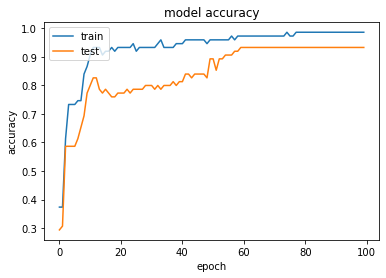

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

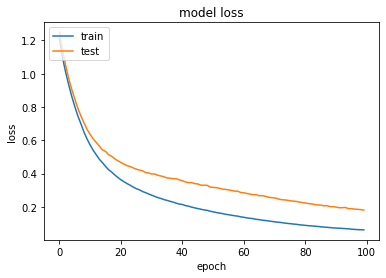

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

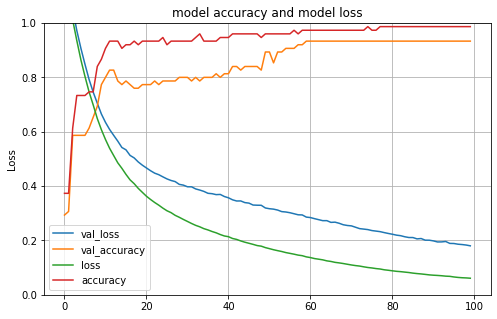

In [14]:
pd.DataFrame(history.history).plot(
 figsize=(8, 5),grid=True,
 ylim=(0,1), ylabel="Loss")
plt.title('model accuracy and model loss')
plt.show()

#### 14) – THIS STEP IS OPTIONAL! Look at the example flow of a keras project as presented inhttps://keras.io/guides/functional_api/. Notice the steps to plot the model as a graph. You can generate a nicevisualization of the model. You don't need to do it for this step, but might be good to try out and know how todo for your future.

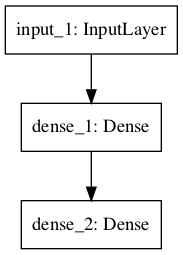

In [15]:
from keras.utils import plot_model
plot_model(model)

#### 15) Try to change some parameters with the model. However, instead of copying and pasting each individualline you wrote above, follow the approach of creating the entire structure in a single notebook cell. This willget you started:

In [16]:
inputs = Input(shape=(4,))
layer1 = Dense(10, activation='sigmoid')(inputs)
layer2 = Dense(10, activation="sigmoid")(layer1)
outputs = Dense(3, activation="softmax")(layer2)
model = Model(inputs=inputs, outputs=outputs, name="simple_iris_model_2")

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train, batch_size=1, epochs=100, validation_data=(X_test, y_test), verbose=False)

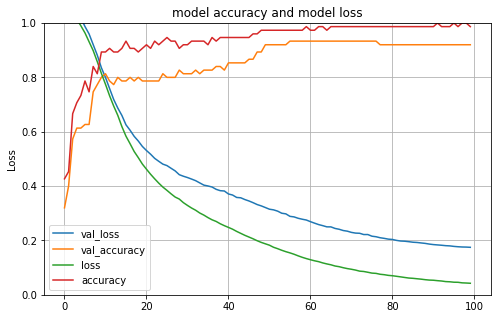

In [17]:
pd.DataFrame(history.history).plot(
 figsize=(8, 5),grid=True,
 ylim=(0,1), ylabel="Loss")
plt.title('model accuracy and model loss')
plt.show()

By adding another hidden layer with the same node size, it made
it required fewer (inconsistently) epochs to get to the same level of accuracy
as the previous one. The train time was noticeably longer.

#### 16) OK, one more time. This time, copy the same model, but use an SGD optimizer. Of course, you may havealready chosen this by specifying the optimizer='sgd' parameter when you compiled your model. Thistime, you will instantiate your optimizer.

In [18]:
from keras.optimizers import SGD

inputs = Input(shape=(4,))
layer = Dense(12, activation='sigmoid')(inputs)
outputs = Dense(3, activation='softmax')(layer)
model = Model(inputs=inputs, outputs=outputs, name="simple_iris_model")

model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(lr=0.05, momentum=0.5),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=1, epochs=100, validation_data=(X_test, y_test), verbose=False)

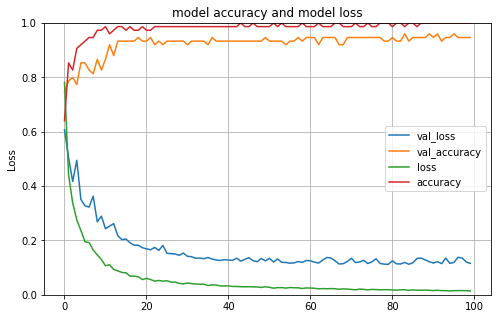

In [19]:
pd.DataFrame(history.history).plot(
 figsize=(8, 5),grid=True,
 ylim=(0,1), ylabel="Loss")
plt.title('model accuracy and model loss')
plt.show()

This new learning rate and momentum makes it so it takes fewer
epochs to hit a consistently high accuracy rate. But there is more
back and forth after it evens out, so it seems like it is shooting
past the optimum model after a threshold.

#### 17) Remember, this is a classification problem. Use your model to predict the classes for the test data (using thefunction predict on the model object itself) and store the results as y_pred.

In [20]:
y_pred = pd.DataFrame(model.predict(X_test))

#### 18) Notice the structure of y_pred. Remember, softmax generates probabilistic output. So, turn this into a newvariable called y_pred_class that predicts the actual class label. (HINT: argmax is your friend!)

In [21]:
y_pred_class = y_pred.apply(pd.Series.argmax, axis=1)
y_pred_class

0     2
1     2
2     2
3     0
4     1
     ..
70    0
71    2
72    2
73    0
74    1
Length: 75, dtype: int64

#### 19) Finally, using your code from the lab on classification, output the confusion_matrix and theclassification_report (from scikit-learn's metric package) to print out the complete performanceresults.

In [22]:
y_test = y_test.apply(pd.Series.argmax, axis=1)

In [23]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.95      0.86      0.90        22
           2       0.91      1.00      0.95        30

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



In [24]:
confusion_matrix(y_test, y_pred_class)

array([[22,  1,  0],
       [ 0, 19,  3],
       [ 0,  0, 30]])

#### 20) Import the above class into your code. Then write a function called create_keras_model(). Copy all ofyour code that creates the Model instance, adds the layers, sets the appropriate activation functions, andcompiles it, into this single function.

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier

def create_keras_model():
    inputs = Input(shape=(4,))
    layer = Dense(12, activation='sigmoid')(inputs)
    outputs = Dense(3, activation="softmax")(layer)
    model = Model(inputs=inputs,
                  outputs=outputs,
                  name="simple_iris_model_3")
    sgd = SGD(lr=0.02,momentum=0.7)
    model.compile(optimizer=sgd,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

clf = KerasClassifier(build_fn=create_keras_model, verbose=0, epochs=100, batch_size=1)

#### 21) At this point, you now have a classifier model that behaves like any other scikit-learn classifier! Cool, right?So, using the clf classifier above, use it just like you would any other classifier. Run the fit method on your classifier, just like you did in lab10. Use X_train and the one hot encoded y_train data. Then, use thepredict() method to generate class predictions on X_test. Store the results in y_pred.

In [26]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### 22) Use the predictions to generate a confusion matrix.

In [27]:
confusion_matrix(y_test, y_pred)

array([[23,  0,  0],
       [ 0, 19,  3],
       [ 0,  0, 30]])

#### 23) Generate a performance report with the classification_report function.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.86      0.93        22
           2       0.91      1.00      0.95        30

    accuracy                           0.96        75
   macro avg       0.97      0.95      0.96        75
weighted avg       0.96      0.96      0.96        75



#### 24) Now, harness the power of wrapping this class. Use your code from lab10 that performed a full crossvalidation. For sake of your time, you may set K to 5. Also, you will likely want to disable verbose mode forthis, otherwise you'll have a LOT of output. AND, because deep learning models can take a while to train eachmodel, it is a good idea to generate some output in your loop to show that the cross validation is progressing.

In [29]:
from sklearn.model_selection import KFold
from time import time

kfold = KFold(n_splits=5, shuffle=False)

pred = []
test = []

for i, (train_index, test_index) in enumerate(kfold.split(X)):
    print("Starting Fold", i+1)
    t = time()

    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]

    y_train = pd.get_dummies(data=y_train, prefix='species')
    y_test = pd.get_dummies(data=y_test, prefix='species')

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    y_test = y_test.apply(pd.Series.argmax, axis=1)
    test.extend(y_test)
    pred.extend(y_pred)
    print("Fold", i+1, "completed, time:", round(time() - t, 2), "sec")

Starting Fold 1
Fold 1 completed, time: 9.86 sec
Starting Fold 2
Fold 2 completed, time: 10.51 sec
Starting Fold 3
Fold 3 completed, time: 10.53 sec
Starting Fold 4
Fold 4 completed, time: 9.79 sec
Starting Fold 5
Fold 5 completed, time: 11.83 sec


#### 25) Generate a full confusion matrix and final classification report based on your 5-fold cross validation of thekeras model.

In [30]:
confusion_matrix(test, pred)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  2, 48]])

In [31]:
print(classification_report(test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.92      0.94        50
           2       0.92      0.96      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

